In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# TotalCharges estava como objeto, e deve ser numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
# Verificando os valores nulos em TotalCharges
df['TotalCharges'].isnull().sum()

np.int64(11)

In [6]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
#Identificado que todos os clientes com TotalCharges nulo tem tenure igual a 0, ou seja, 
# são clientes que acabaram de entrar e ainda não tiveram cobrança. 
# Portanto, podemos preencher esses valores com 0 ou remover essas linhas, uma vez que 
# representam uma parcela muito pequena do dataset.

df = df.dropna(subset=['TotalCharges'])

In [8]:
df.loc[:, 'Churn'] = df['Churn'].map({'Yes':1, 'No': 0})
df['Churn'].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [9]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
total_clientes = df.shape[0]
churn_rate = df['Churn'].mean()

print(f"Total de clientes: {total_clientes}")
print(f"Taxa de churn: {churn_rate:.2%}")

print(f"A taxa geral de churn de {churn_rate:.2%}, indica que 1 a cada {1/ churn_rate:.1f} pessoas cancela o serviço.")

Total de clientes: 7032
Taxa de churn: 26.58%
A taxa geral de churn de 26.58%, indica que 1 a cada 3.8 pessoas cancela o serviço.


In [15]:
receita_mensal_total = df['MonthlyCharges'].sum()
print(f"Receita mensal total estimada: R$ {receita_mensal_total:,.2f}")

Receita mensal total estimada: R$ 455,661.00


In [60]:
receita_perdida_mensal = df[df['Churn'] == 1]['MonthlyCharges'].sum()
print(f'Receita MENSAL perdida com Churn: R$ {receita_perdida_mensal:,.2f}\n')

receita_perdida_total = receita_perdida_mensal * 12
print(f'Receita ANUAL perdida com Churn: R$ {receita_perdida_total:,.2f}')

Receita MENSAL perdida com Churn: R$ 139,130.85

Receita ANUAL perdida com Churn: R$ 1,669,570.20


In [20]:
churn_por_contrato = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
churn_por_contrato

Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: object

In [43]:
contrato_stats = df.groupby('Contract').agg(
    total_clientes_contrato=('Churn', 'count'),
    churn_rate=('Churn', 'mean')
).sort_values(by='churn_rate', ascending=False)

contrato_stats['%_do_total'] = contrato_stats['total_clientes_contrato'] / df.shape[0]

colunas_ordenadas = ['total_clientes_contrato', '%_do_total', 'churn_rate']
contrato_stats = contrato_stats[colunas_ordenadas]

contrato_stats

,total_clientes_contrato,%_do_total,churn_rate
Contract,,,
Month-to-month,3875,0.551052,0.427097
One year,1472,0.209329,0.112772
Two year,1685,0.239619,0.028487


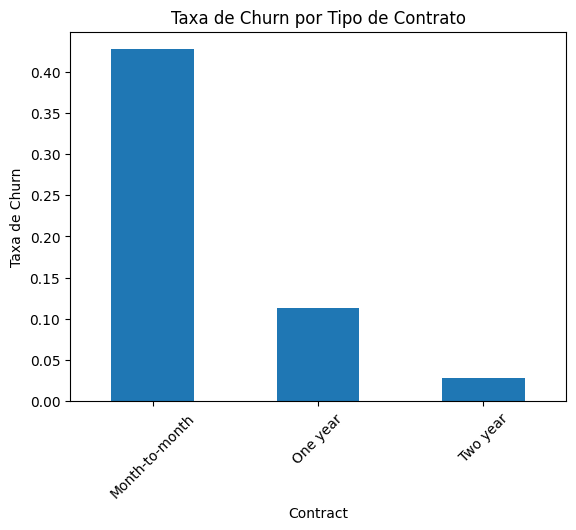

In [44]:
import matplotlib.pyplot as plt

contrato_stats['churn_rate'].plot(kind='bar')
plt.title('Taxa de Churn por Tipo de Contrato')
plt.ylabel('Taxa de Churn')
plt.xticks(rotation=45)
plt.show()

In [45]:
receita_contrato_churn = df[df['Churn'] == 1].groupby('Contract')['MonthlyCharges'].sum()

receita_contrato_churn

Contract
Month-to-month    120847.10
One year           14118.45
Two year            4165.30
Name: MonthlyCharges, dtype: float64

In [64]:
percentual_receita_churn = (
    receita_contrato_churn / receita_perdida_mensal
) * 100

percentual_receita_churn


Contract
Month-to-month    86.858594
One year          10.147606
Two year           2.993800
Name: MonthlyCharges, dtype: float64

Clientes com contrato mensal apresentam taxa de churn significativamente superior aos contratos anuais.
Apesar de representarem 55% da base, concentram 87% da receita perdida mensal, indicando necessidade de estratégia 
específica de retenção ou incentivo à migração para contratos de maior prazo.

In [69]:
contrato_stats = df.groupby('Contract').agg(
    total_clientes=('Churn', 'count'),
    churn_rate=('Churn', 'mean'),
    receita_perdida_mensal=('MonthlyCharges',
                     lambda x: x[df.loc[x.index, 'Churn'] == 1].sum())
)

contrato_stats['%_do_total'] = (
    contrato_stats['total_clientes'] / df.shape[0]
) * 100

contrato_stats['percentual_receita_churn'] = (
    contrato_stats['receita_perdida_mensal'] / contrato_stats['receita_perdida_mensal'].sum()
) * 100


colunas_ordenadas = ['total_clientes', '%_do_total', 'churn_rate', 'receita_perdida_mensal', 'percentual_receita_churn']
contrato_stats = contrato_stats[colunas_ordenadas]

contrato_stats

,total_clientes,%_do_total,churn_rate,receita_perdida_mensal,percentual_receita_churn
Contract,,,,,
Month-to-month,3875,55.105233,0.427097,120847.10,86.858594
One year,1472,20.932878,0.112772,14118.45,10.147606
Two year,1685,23.961889,0.028487,4165.30,2.993800


In [70]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1 ano', '1-2 anos', '2-4 anos', '4-6 anos']
)

In [73]:
churn_cruzado = df.groupby(
    ['Contract', 'tenure_group']
).agg(
    total_clientes=('Churn', 'count'),
    churn_rate=('Churn', 'mean')
).reset_index()

churn_cruzado

C:\Users\Helio\AppData\Local\Temp\ipykernel_10360\2770009088.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_cruzado = df.groupby(


,Contract,tenure_group,total_clientes,churn_rate
0,Month-to-month,0-1 ano,1994,0.513541
1,Month-to-month,1-2 anos,737,0.377205
2,Month-to-month,2-4 anos,802,0.329177
3,Month-to-month,4-6 anos,342,0.260234
4,One year,0-1 ano,123,0.105691
5,One year,1-2 anos,197,0.081218
6,One year,2-4 anos,518,0.106178
7,One year,4-6 anos,634,0.129338
8,Two year,0-1 ano,58,0.0
9,Two year,1-2 anos,90,0.0


In [79]:
pivot_churn = churn_cruzado.pivot(
    index='tenure_group',
    columns='Contract',
    values='churn_rate'

)

pivot_churn = pivot_churn.astype(float)


pivot_churn

Contract,Month-to-month,One year,Two year
tenure_group,,,
0-1 ano,0.513541,0.105691,0.000000
1-2 anos,0.377205,0.081218,0.000000
2-4 anos,0.329177,0.106178,0.021898
4-6 anos,0.260234,0.129338,0.033254


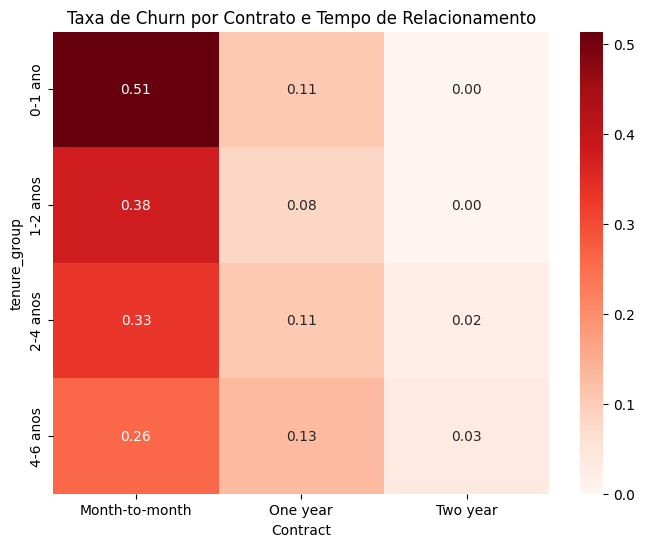

In [80]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot_churn, annot=True, fmt=".2f", cmap="Reds")
plt.title("Taxa de Churn por Contrato e Tempo de Relacionamento")
plt.show()

In [81]:
grupo_risco = df[
    (df['Contract'] == 'Month-to-month')&
    (df['tenure_group'] == '0-1 ano')&
    (df['Churn'] == 1)
]

receita_grupo_risco = grupo_risco['MonthlyCharges'].sum()

receita_grupo_risco

np.float64(68301.45)

Ou seja, cenário total:

Receita total perdida: R$ 139130.85

Receita perdida Month-to-Month:  R$ 120847.10

Receita perdida M-M menos de 1 ano:  R$ 68301.45



In [82]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
0    61.307408
1    74.441332
Name: MonthlyCharges, dtype: float64

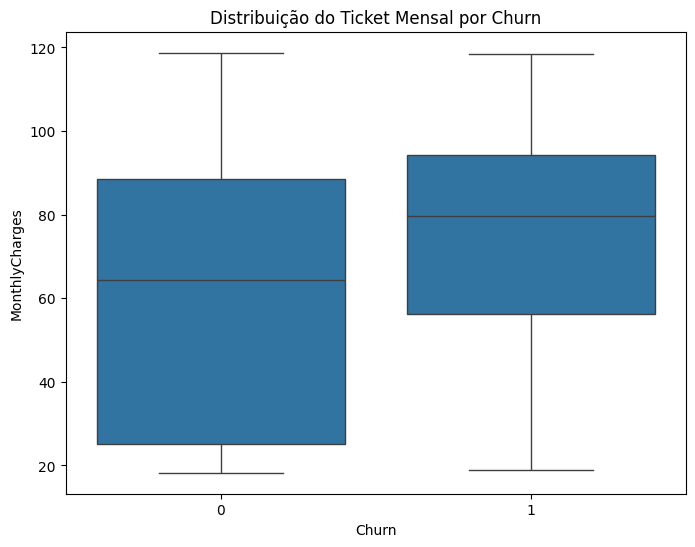

In [83]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribuição do Ticket Mensal por Churn')
plt.show()

In [84]:
df['ticket_group'] = pd.qcut(
    df['MonthlyCharges'],
    q=4,
    labels=['Muito Baixo', 'Baixo', 'Alto', 'Muito Alto']
)


In [85]:
ticket_stats = df.groupby('ticket_group').agg(
    total_clientes=('Churn', 'count'),
    churn_rate=('Churn', 'mean')
).sort_values(by='churn_rate', ascending=False)

ticket_stats

C:\Users\Helio\AppData\Local\Temp\ipykernel_10360\1202651806.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ticket_stats = df.groupby('ticket_group').agg(


,total_clientes,churn_rate
ticket_group,,
Alto,1755,0.375499
Muito Alto,1758,0.328783
Baixo,1761,0.245883
Muito Baixo,1758,0.113197


In [86]:
receita_ticket = df[df['Churn'] == 1].groupby('ticket_group')['MonthlyCharges'].sum()

percentual_receita_ticket = (
    receita_ticket / receita_ticket.sum()
) * 100

percentual_receita_ticket

C:\Users\Helio\AppData\Local\Temp\ipykernel_10360\1178969730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  receita_ticket = df[df['Churn'] == 1].groupby('ticket_group')['MonthlyCharges'].sum()


ticket_group
Muito Baixo     3.457716
Baixo          17.203014
Alto           38.008573
Muito Alto     41.330697
Name: MonthlyCharges, dtype: float64

- Churn maior na faixa de ticket Muito Alto, 41,33% = Risco financeiro alto, prioridade de retenção.
- Tickets Alto e Muito Alto  = 79% da receita perdidae. Ou seja, quem paga mais, está cancelando mais!
- Problema de Churn mais contentrado em clientes de maior valor, aumenta significamente o impacto financeiro.
- Pode indicar uma percepção de preço alto  x benefício percebido (custo benefício)

In [94]:
receita_tenure_churn = df[df['Churn'] == 1].groupby('tenure_group')['MonthlyCharges'].sum()

receita_tenure_churn

C:\Users\Helio\AppData\Local\Temp\ipykernel_10360\1823531654.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  receita_tenure_churn = df[df['Churn'] == 1].groupby('tenure_group')['MonthlyCharges'].sum()


tenure_group
0-1 ano     68954.25
1-2 anos    23081.65
2-4 anos    27462.50
4-6 anos    19632.45
Name: MonthlyCharges, dtype: float64

In [87]:
cross_ticket_tenure = df.groupby(
    ['ticket_group', 'tenure_group']
).agg(
    total_clientes=('Churn', 'count'),
    churn_rate=('Churn', 'mean')
).reset_index()

cross_ticket_tenure

C:\Users\Helio\AppData\Local\Temp\ipykernel_10360\3948680976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cross_ticket_tenure = df.groupby(


,ticket_group,tenure_group,total_clientes,churn_rate
0,Muito Baixo,0-1 ano,647,0.247295
1,Muito Baixo,1-2 anos,276,0.057971
2,Muito Baixo,2-4 anos,384,0.044271
3,Muito Baixo,4-6 anos,451,0.013304
4,Baixo,0-1 ano,700,0.437143
5,Baixo,1-2 anos,276,0.221014
6,Baixo,2-4 anos,379,0.110818
7,Baixo,4-6 anos,406,0.059113
8,Alto,0-1 ano,608,0.664474
9,Alto,1-2 anos,278,0.402878


In [91]:
pivot_ticket_tenure = cross_ticket_tenure.pivot(
    index='tenure_group',
    columns='ticket_group',
    values='churn_rate'
)

pivot_ticket_tenure = pivot_ticket_tenure.astype(float)

pivot_ticket_tenure

ticket_group,Muito Baixo,Baixo,Alto,Muito Alto
tenure_group,,,,
0-1 ano,0.247295,0.437143,0.664474,0.759091
1-2 anos,0.057971,0.221014,0.402878,0.541237
2-4 anos,0.044271,0.110818,0.291237,0.345372
4-6 anos,0.013304,0.059113,0.062370,0.169811


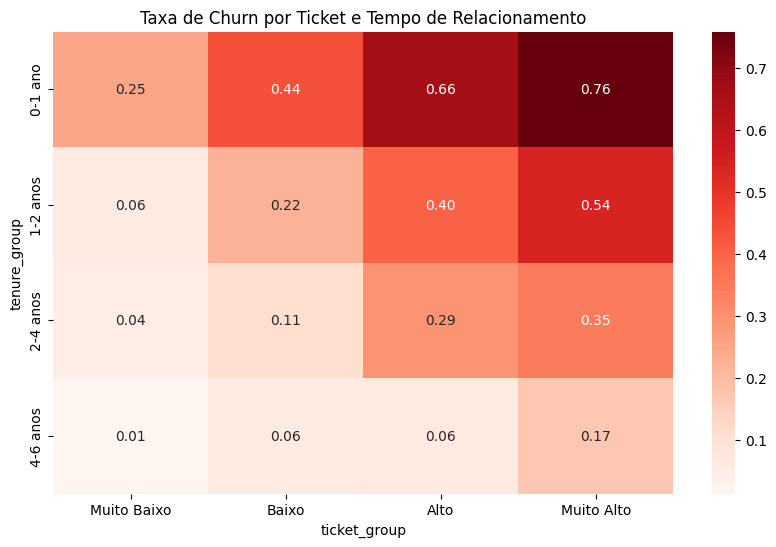

In [92]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_ticket_tenure, annot=True, fmt=".2f", cmap="Reds")
plt.title("Taxa de Churn por Ticket e Tempo de Relacionamento")
plt.show()

In [93]:
grupo_critico = df[
    (df['ticket_group'].isin(['Alto','Muito Alto'])) &
    (df['tenure_group'] == '0-1 ano') &
    (df['Churn'] == 1)
]

receita_grupo_critico = grupo_critico['MonthlyCharges'].sum()

percentual_grupo = (
    receita_grupo_critico / 
    df[df['Churn'] == 1]['MonthlyCharges'].sum()
)*100

receita_grupo_critico, percentual_grupo

(np.float64(48257.0), np.float64(34.684615238101394))

Ou seja, cenário total:

Receita total perdida: R$ 139130.85

Receita perdida 0-1 ano:  R$ 68954.25

Receita perdida 0-1 ano / Alto e Muito Alto:  R$ 48257,00